In [222]:
# import necessary libary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

# Data clean

In [223]:
# data load
df = pd.read_csv("weight-height (1) - weight-height (1).csv")
# data show
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [224]:
df['Gender'] = df['Gender'].replace({'Male' : 1, 'Female' : 0})

C:\Users\ABDULLAH AL MASUM\AppData\Local\Temp\ipykernel_27980\1472408718.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male' : 1, 'Female' : 0})


In [225]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [226]:
df.shape

(8555, 3)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [228]:
df.describe()

,Gender,Height,Weight
count,8555.000000,8555.000000,8555.000000
mean,0.584454,66.809925,165.632735
std,0.492845,3.851454,32.043922
min,0.000000,54.616858,65.780000
25%,0.000000,63.957684,139.876803
50%,1.000000,66.985923,168.521567
75%,1.000000,69.604427,190.666305
max,1.000000,80.450000,269.989698


In [229]:
df.duplicated().sum()

np.int64(0)

In [230]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# visualization

Text(0.5, 1.0, 'Height and weight relation')

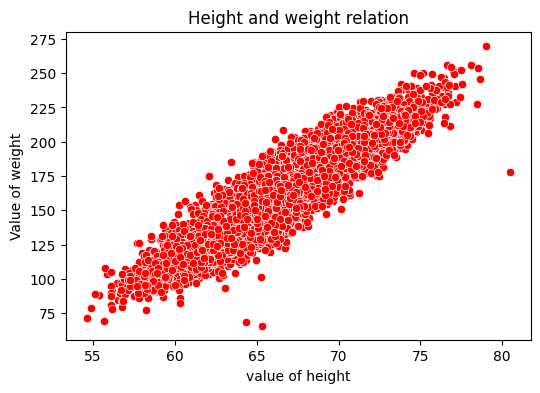

In [231]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = "Height", y = "Weight", data = df, color="r")
plt.xlabel("value of height")
plt.ylabel("Value of weight")
plt.title("Height and weight relation")

In [232]:
# find co relation
df[['Height', 'Weight']].corr()

,Height,Weight
Height,1.000000,0.922975
Weight,0.922975,1.000000


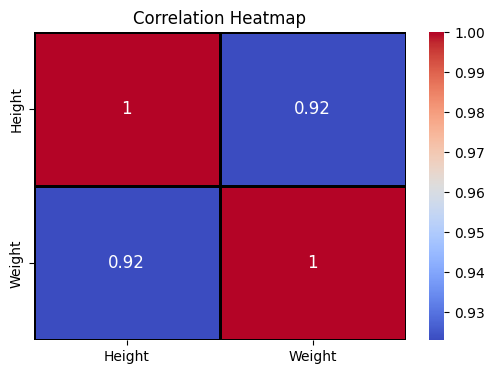

In [233]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Height', 'Weight']].corr(),annot=True,cmap="coolwarm",linewidths=1,
    linecolor="black", annot_kws={"size":12} )
plt.title("Correlation Heatmap")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [234]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [235]:
# data separation
x= df.drop(['Gender'], axis=1)
y= df['Gender']


In [236]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [237]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [238]:
# split the data
xtrain, xtest, ytrain,ytest= train_test_split(x,y ,train_size=.80, random_state=42)

In [239]:
xtrain.head()

,Height,Weight
6826,60.817590,133.879483
624,71.711125,199.080779
5518,63.674482,134.660232
3946,70.466623,187.283252
6993,61.528212,117.654738


In [240]:
ytrain.head()

6826    0
624     1
5518    0
3946    1
6993    0
Name: Gender, dtype: int64

In [241]:
xtest.head()

,Height,Weight
6006,64.846644,149.668369
1197,68.886367,197.642244
2862,70.963369,178.551191
6497,62.737189,141.343095
2860,69.578030,195.322675


In [242]:
ytest.head()

6006    0
1197    1
2862    1
6497    0
2860    1
Name: Gender, dtype: int64

In [243]:
# model implementation
lr = LinearRegression()
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [244]:
# train the model
model= lr.fit(xtrain, ytrain)

In [245]:
# check the train score
model.score(xtrain, ytrain)

0.6328883311810236

In [246]:
# test the model
model.score(xtest,ytest)

0.6645033849147478

In [247]:
# prediction generate
pred_y = model.predict(xtest)
pred_y

array([0.40061044, 1.03308906, 0.63483012, ..., 0.74861532, 1.08347134,
       0.55387876], shape=(1711,))

In [248]:
xtest.shape, ytest.shape, pred_y.shape

((1711, 2), (1711,), (1711,))

In [249]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [250]:
df["predicted"]= model.predict(df[["Height", "Weight"]])
df.head()

,Gender,Height,Weight,predicted
0,1,73.847017,241.893563,1.567389
1,1,68.781904,162.310473,0.453090
2,1,74.110105,212.740856,1.074930
3,1,71.730978,220.042470,1.290288
4,1,69.881796,206.349801,1.137458


In [251]:
df["error"]= df["Weight"]- df["predicted"]
df.head()

,Gender,Height,Weight,predicted,error
0,1,73.847017,241.893563,1.567389,240.326175
1,1,68.781904,162.310473,0.453090,161.857382
2,1,74.110105,212.740856,1.074930,211.665925
3,1,71.730978,220.042470,1.290288,218.752183
4,1,69.881796,206.349801,1.137458,205.212342


In [252]:
ytest.head()

6006    0
1197    1
2862    1
6497    0
2860    1
Name: Gender, dtype: int64

In [253]:
# xtest = xtest.rename(columns={'Weight': 'Height'})
# y_pred = model.predict(xtest[['Height']])

In [254]:
# mse cheaking error
mse = mean_squared_error(ytest,y_pred)
mse


28431.566330493497

In [255]:
mae= mean_absolute_error(ytest, y_pred)
mae

166.04976909158745

In [256]:
# check the score
r_scor= r2_score(ytest, y_pred)
r_scor

-117307.65149523299

In [257]:
# find the value of m
m = model.coef_
m

array([-0.03977805,  0.01653339])

In [258]:
c = model.intercept_
c

np.float64(0.5055574377152853)

In [259]:
y = m * 50 + c
y

array([-1.48334489,  1.33222705])

Text(0.5, 1.0, 'Height and weight relation')

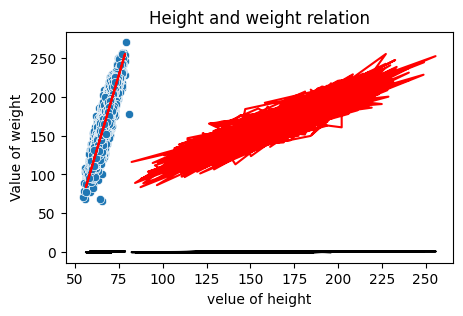

In [260]:
# best fit line
plt.figure(figsize=(5,3))
sns.scatterplot(x= "Height", y = "Weight", data= df)
plt.plot(xtest, y_pred, color= "r")
plt.plot(xtest, ytest, color= "black")
plt.xlabel("velue of height")
plt.ylabel("Value of weight")
plt.title("Height and weight relation")

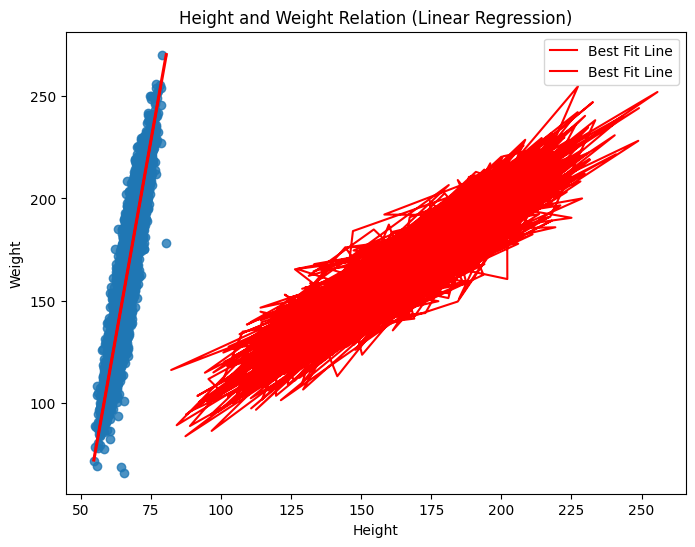

In [261]:
plt.figure(figsize=(8, 6))

sns.regplot(x="Height", y="Weight", data=df, line_kws={"color": "red"})
plt.plot(xtest, y_pred, color="red",  label="Best Fit Line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height and Weight Relation (Linear Regression)")
plt.legend()
plt.show()

#knn


C:\Users\ABDULLAH AL MASUM\AppData\Local\Temp\ipykernel_27980\2397343086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Weight', data=df, palette='viridis')


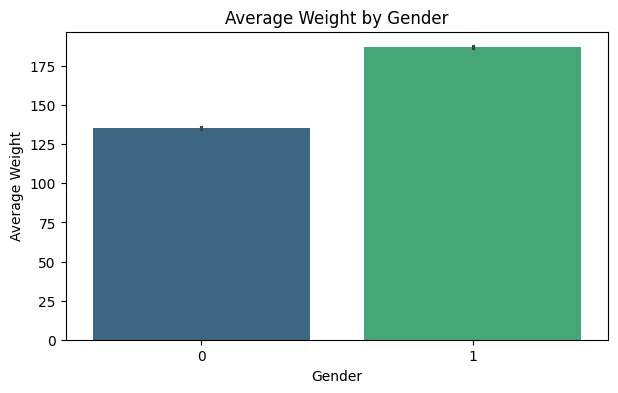

In [262]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Gender', y='Weight', data=df, palette='viridis')
plt.title('Average Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Weight')

plt.show()

In [263]:
mms=MinMaxScaler()
le= LabelEncoder()

In [264]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        x[col]= mms.fit_transform(x[[col]])
    else:
        x[col]= le.fit_transform(x[col])


In [265]:
x.head()

,Height,Weight
0,0.744399,0.862415
1,0.548328,0.472703
2,0.754583,0.719657
3,0.662487,0.755412
4,0.590905,0.688360


In [266]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((6844, 2), (1711, 2), (6844,), (1711,))

In [267]:
df.head()

,Gender,Height,Weight,predicted,error
0,1,73.847017,241.893563,1.567389,240.326175
1,1,68.781904,162.310473,0.453090,161.857382
2,1,74.110105,212.740856,1.074930,211.665925
3,1,71.730978,220.042470,1.290288,218.752183
4,1,69.881796,206.349801,1.137458,205.212342


In [268]:
lr = LinearRegression()
knn = KNeighborsClassifier(n_neighbors=5)

In [269]:
model = knn.fit(xtrain, ytrain)

In [270]:
knn.score(xtrain, ytrain)

0.9282583284628872

In [271]:
knn.score(xtest, ytest)

0.9181765049678551

In [272]:
# prediction
pred = model.predict(xtest)
pred


array([0, 1, 1, ..., 1, 1, 1], shape=(1711,))

In [273]:
ytest

6006    0
1197    1
2862    1
6497    0
2860    1
       ..
2614    1
8456    0
4855    1
847     1
1877    1
Name: Gender, Length: 1711, dtype: int64

In [274]:
confusion_matrix(pred, ytest)

array([[630,  64],
       [ 76, 941]])

In [275]:
cm = confusion_matrix(ytest,pred)